<a href="https://colab.research.google.com/github/NGUYEN-VAN-HCMUT/Code_Numerical_Method/blob/master/Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Newton Method

In [1]:
from scipy import linalg as la
from scipy import optimize
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt

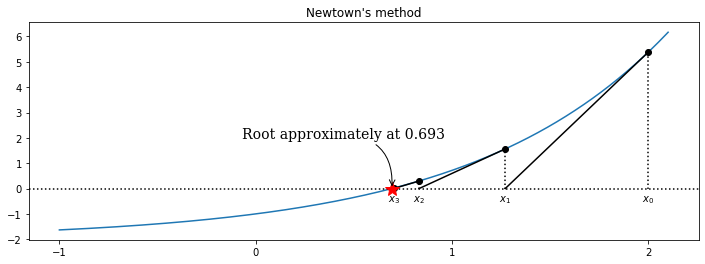

In [4]:
 # define a function, desired tolerance and starting point xk
tol = 0.01
xk = 2

s_x = sympy.symbols("x")
s_f = sympy.exp(s_x) - 2 

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)

x = np.linspace(-1, 2.1, 1000) 

# setup a graph for visualizing the root finding steps
fig, ax = plt.subplots(1, 1, figsize=(12,4)) 

ax.plot(x, f(x))
ax.axhline(0, ls=':', color='k') 

# iterate Newton's method until convergence to the desired tolerance has been reached
n = 0
while f(xk) > tol:
    xk_new = xk - f(xk)/fp(xk)

    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-') 

    xk = xk_new
    n += 1 

ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate("Root approximately at %.3f" % xk,
            fontsize=14, family="serif",
            xy=(xk, f(xk)), xycoords='data',
            xytext=(-150, +50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5")) 

ax.set_title("Newtown's method")
ax.set_xticks([-1, 0, 1, 2])